In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import metrics
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.model_selection import cross_validate, LeaveOneGroupOut
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
import sklearn
%matplotlib inline

## Load Subject Data

In [2]:
BASE_PATH = 'segmented_data'

In [3]:
# subjects_data = [pd.read_feather(os.path.join(BASE_PATH, subject)) for subject in os.listdir(BASE_PATH)]
# df = pd.concat(subjects_data)
# df.drop(columns=['index'], inplace=True)
# df.shape

In [4]:
# df.to_csv('segmented_data/all_subjects.csv')

In [5]:
df = pd.read_csv(f'{BASE_PATH}/all_subjects.csv', index_col=0)

In [6]:
df.shape

(121813, 79)

In [7]:
df.head()

,ACC_x_absint,ACC_x_mean,ACC_x_peak,ACC_x_std,ACC_xyz_absint,ACC_xyz_std,ACC_xzy_mean,ACC_y_absint,ACC_y_mean,ACC_y_peak,...,RESP_stretch,RESP_volume,TEMP_drange,TEMP_max,TEMP_mean,TEMP_min,TEMP_slope,TEMP_std,label,subject
0,33018.685611,0.786178,0.8766,0.030389,13233.532886,21266.015893,6736.963395,6256.039785,0.148957,0.2504,...,10.783828,125.194862,1.010598,35.171936,34.988750,34.803101,-0.000002,0.054536,3,S8
1,33012.188012,0.786023,0.8766,0.030383,13228.857486,21267.760722,6732.487596,6260.111985,0.149054,0.2504,...,10.783828,125.194862,1.010598,35.171936,34.988785,34.803101,-0.000002,0.054524,3,S8
2,33006.168612,0.785880,0.8766,0.030367,13225.533786,21268.840449,6728.895262,6264.232385,0.149152,0.2504,...,10.783828,125.194862,1.010598,35.171936,34.988869,34.803101,-0.000002,0.054485,3,S8
3,33005.078112,0.785855,0.8766,0.030379,13228.145587,21269.264878,6729.222863,6268.463386,0.149253,0.2504,...,10.783828,125.194862,1.010598,35.171936,34.988983,34.803101,-0.000002,0.054432,3,S8
4,33008.020712,0.785926,0.9390,0.030564,13234.658287,21268.410145,6732.741796,6270.908585,0.149312,0.2504,...,10.783828,119.178477,1.010598,35.171936,34.989079,34.803101,-0.000002,0.054387,3,S8


In [8]:
df.columns

Index(['ACC_x_absint', 'ACC_x_mean', 'ACC_x_peak', 'ACC_x_std',
       'ACC_xyz_absint', 'ACC_xyz_std', 'ACC_xzy_mean', 'ACC_y_absint',
       'ACC_y_mean', 'ACC_y_peak', 'ACC_y_std', 'ACC_z_absint', 'ACC_z_mean',
       'ACC_z_peak', 'ACC_z_std', 'ECG_hr_mean', 'ECG_hr_std', 'ECG_hrv_HF',
       'ECG_hrv_HFn', 'ECG_hrv_LF', 'ECG_hrv_LFHF_ratio', 'ECG_hrv_LFn',
       'ECG_hrv_NN50', 'ECG_hrv_RMS', 'ECG_hrv_TINN', 'ECG_hrv_ULF',
       'ECG_hrv_VHF', 'ECG_hrv_f_sum', 'ECG_hrv_pNN50', 'ECG_hrv_rel_HF',
       'ECG_hrv_rel_LF', 'ECG_hrv_rel_ULF', 'ECG_hrv_rel_VHF', 'EDA_SCL_mean',
       'EDA_SCL_std', 'EDA_SCR_mean', 'EDA_SCR_no', 'EDA_SCR_std',
       'EDA_ampl_sum', 'EDA_corr_SCL_t', 'EDA_drange', 'EDA_max', 'EDA_mean',
       'EDA_min', 'EDA_scr_area', 'EDA_slope', 'EDA_std', 'EMG_absint',
       'EMG_drange', 'EMG_mean', 'EMG_mean_freq', 'EMG_median',
       'EMG_median_freq', 'EMG_peak_amp_mean', 'EMG_peak_amp_norm_sum',
       'EMG_peak_amp_std', 'EMG_peak_amp_sum', 'EMG_peak_freq

In [9]:
with pd.option_context("display.max_rows", df.columns.shape[0]): 
        display(df.head().T)

,0,1,2,3,4
ACC_x_absint,33018.7,33012.2,33006.2,33005.1,33008
ACC_x_mean,0.786178,0.786023,0.78588,0.785855,0.785926
ACC_x_peak,0.8766,0.8766,0.8766,0.8766,0.939
ACC_x_std,0.0303892,0.0303835,0.0303673,0.0303795,0.0305639
ACC_xyz_absint,13233.5,13228.9,13225.5,13228.1,13234.7
ACC_xyz_std,21266,21267.8,21268.8,21269.3,21268.4
ACC_xzy_mean,6736.96,6732.49,6728.9,6729.22,6732.74
ACC_y_absint,6256.04,6260.11,6264.23,6268.46,6270.91
ACC_y_mean,0.148957,0.149054,0.149152,0.149253,0.149312
ACC_y_peak,0.2504,0.2504,0.2504,0.2504,0.2504


In [10]:
with pd.option_context("display.max_rows", df.columns.shape[0], "display.max_columns", 100):
    display(df.describe().T)

,count,mean,std,min,25%,50%,75%,max
ACC_x_absint,121813.0,3.373182e+04,5.442559e+03,1.115059e+04,3.046235e+04,3.594657e+04,3.770159e+04,38482.839411
ACC_x_mean,121813.0,8.031577e-01,1.295878e-01,2.654967e-01,7.253115e-01,8.558914e-01,8.976773e-01,0.916280
ACC_x_peak,121813.0,9.008852e-01,1.670471e-01,2.905999e-01,8.162000e-01,9.318000e-01,9.940000e-01,1.553400
ACC_x_std,121813.0,1.576536e-02,2.159889e-02,2.540918e-03,6.727452e-03,1.019764e-02,1.733832e-02,0.334104
ACC_xyz_absint,121813.0,1.126388e+04,6.171864e+03,6.333725e-01,6.368842e+03,1.208748e+04,1.549643e+04,31365.086834
ACC_xyz_std,121813.0,2.083812e+04,1.923747e+03,1.066439e+04,1.977699e+04,2.109936e+04,2.246112e+04,23359.812435
ACC_xzy_mean,121813.0,5.946100e+03,5.767697e+03,-1.066388e+04,1.433468e+03,7.286843e+03,1.010301e+04,19538.685476
ACC_y_absint,121813.0,2.875874e+03,3.553315e+03,9.700954e-04,8.820891e+02,1.919441e+03,3.333147e+03,20173.308396
ACC_y_mean,121813.0,-3.171673e-02,1.041193e-01,-4.803281e-01,-5.821665e-02,-2.075289e-02,2.162790e-02,0.206044
ACC_y_peak,121813.0,6.079692e-02,1.348027e-01,-4.514000e-01,1.000047e-03,6.659997e-02,1.274000e-01,0.517600


## Splitting data for CV

In [11]:
X = df.drop(columns=['label', 'subject'])
filter_cols = df.columns[df.columns.str.startswith('ACC')]
X_p = X.drop(columns=df.columns[df.columns.str.startswith('ACC')].values)  # Physiological modalities only
y = df['label']
y_b = y.copy().apply(lambda x: 1 if x == 2 else 0)  # stress vs non-stress
loso_cv = LeaveOneGroupOut()  # just to analyze training set sizes
for x_idxs, y_idxs in loso_cv.split(X, y, groups=df['subject']):
    print(x_idxs.shape)

(113425,)
(113621,)
(113628,)
(113624,)
(113601,)
(113648,)
(113429,)
(114049,)
(113913,)
(113872,)
(113665,)
(113725,)
(113740,)
(113697,)
(113745,)


## Hyperparameters

In [12]:
n_estimators = 100
min_samples_split = 20
criterion = 'entropy'  # information gain
subjects = df['subject'].unique()

In [26]:
def run_cv(clf, X, y, groups, cv, scoring=['accuracy', 'f1_macro'], return_train_score=True,
          return_estimator=True, n_jobs=-1):
    """
        More on cross validation: https://scikit-learn.org/stable/modules/cross_validation.html#
        More on scoring: https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
    """
    return cross_validate(clf, X, y, groups=groups, cv=cv, scoring=scoring, return_train_score=return_train_score,
                          return_estimator=return_estimator, n_jobs=n_jobs)

def raw_scores(cv):
    return np.mean(cv['test_accuracy']), np.mean(cv['test_f1_macro'])

def test_score(cv):
    return {
        'accuracy': f"{np.mean(cv['test_accuracy']) * 100} +-{np.std(cv['test_accuracy']) * 100}",
        'f1_macro': f"{np.mean(cv['test_f1_macro']) * 100} +-{np.std(cv['test_f1_macro']) * 100}"
    }

def min_max(acc_scores):
    print(np.argmax(acc_scores), np.amax(acc_scores))
    print(np.argmin(acc_scores), np.amin(acc_scores))

## Experimental setup

In [53]:
df_report_all = pd.DataFrame()
df_report_phy = pd.DataFrame()

In [365]:
experiment_idx = df_report_all.shape[0]
# df_report_all.loc[experiment_idx, :] = []
# df_report_phy.loc[experiment_idx, :] = []
# df_report_all = df_report_all.append([[]])
# df_report_phy = df_report_phy.append([[]])
f'Experiment No {experiment_idx + 1}'

'Experiment No 5'

# Random Forest

In [366]:
def create_rf_pipeline(n_estimators=100, min_samples_split=20, criterion='entropy', n_jobs=-1):
    model_rf =  RandomForestClassifier(n_estimators=n_estimators, min_samples_split=min_samples_split, 
                                  criterion=criterion, n_jobs=-1)
    return make_pipeline(StandardScaler(), model_rf)

### Baseline vs Stress vs Amusement

#### All modalities

In [367]:
clf_rf_all = create_rf_pipeline(n_estimators=n_estimators, min_samples_split=min_samples_split,
                                criterion=criterion, n_jobs=-1)
cv_rf_all = run_cv(clf_rf_all, X, y, groups=df['subject'], cv=LeaveOneGroupOut())
test_score(cv_rf_all)

{'accuracy': '68.16513325419396 +-16.60036819042444',
 'f1_macro': '56.52126032888619 +-21.21037134783233'}

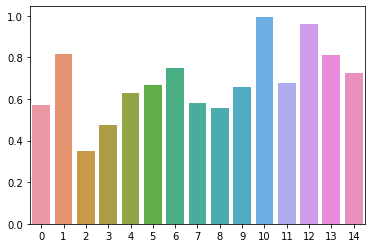

In [368]:
sns.barplot(x=list(range(len(subjects))), y=cv_rf_all['test_accuracy']);

In [369]:
min_max(cv_rf_all['test_accuracy'])

10 0.9959499263622975
2 0.3513744654856445


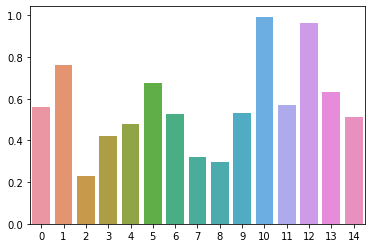

In [370]:
sns.barplot(x=list(range(len(subjects))), y=cv_rf_all['test_f1_macro']);

In [371]:
min_max(cv_rf_all['test_f1_macro'])

10 0.9936861528385794
2 0.2281960896273186


#### Physiological modalities

In [372]:
clf_rf_phy = create_rf_pipeline(n_estimators=n_estimators, min_samples_split=min_samples_split,
                                criterion=criterion, n_jobs=-1)
cv_rf_phy = run_cv(clf_rf_phy, X_p, y, groups=df['subject'], cv=LeaveOneGroupOut())
test_score(cv_rf_phy)

{'accuracy': '71.14370431773794 +-16.073039533797033',
 'f1_macro': '61.76761351290884 +-20.355669500929636'}

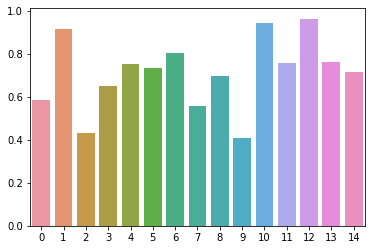

In [373]:
sns.barplot(x=list(range(len(subjects))), y=cv_rf_phy['test_accuracy']);

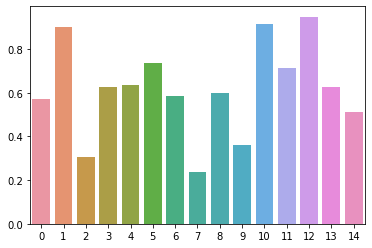

In [374]:
sns.barplot(x=list(range(len(subjects))), y=cv_rf_phy['test_f1_macro']);

### Stress vs Non-Stress

In [375]:
y_b.value_counts()

0    85548
1    36265
Name: label, dtype: int64

#### All modalities

In [376]:
clf_b_rf_all = create_rf_pipeline(n_estimators=n_estimators, min_samples_split=min_samples_split,
                              criterion=criterion, n_jobs=-1)
cv_b_rf_all = run_cv(clf_b_rf_all, X, y_b, groups=df['subject'], cv=LeaveOneGroupOut())
print(test_score(cv_b_rf_all))

{'accuracy': '84.33349928064499 +-12.596472511220755', 'f1_macro': '75.95840616270004 +-21.16801693089855'}


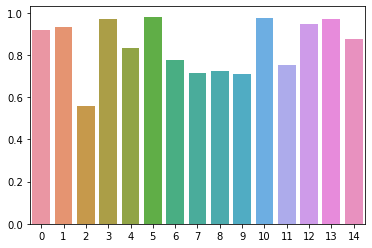

In [377]:
sns.barplot(x=list(range(len(subjects))), y=cv_b_rf_all['test_accuracy']);

In [378]:
min_max(cv_b_rf_all['test_accuracy'])

5 0.9819963257807716
2 0.5584605986560782


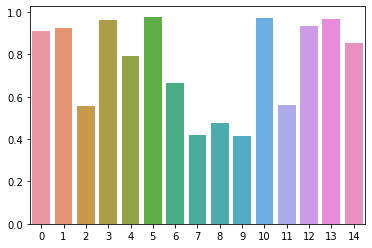

In [379]:
sns.barplot(x=list(range(len(subjects))), y=cv_b_rf_all['test_f1_macro']);

In [380]:
min_max(cv_b_rf_all['test_f1_macro'])

5 0.9782034917887934
9 0.4153291120600795


#### Physiological modalities

In [381]:
clf_b_rf_phy = create_rf_pipeline(n_estimators=n_estimators, min_samples_split=min_samples_split,
                              criterion=criterion, n_jobs=-1)
cv_b_rf_phy = run_cv(clf_b_rf_phy, X_p, y_b, groups=df['subject'], cv=LeaveOneGroupOut())
print(test_score(cv_b_rf_phy))

{'accuracy': '84.93218852223181 +-12.05799327084041', 'f1_macro': '77.82266406484575 +-20.250290686304183'}


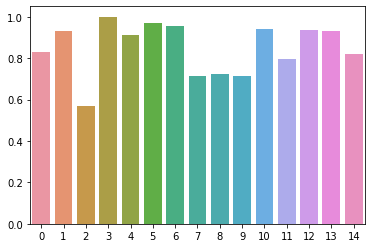

In [382]:
sns.barplot(x=list(range(len(subjects))), y=cv_b_rf_phy['test_accuracy']);

In [383]:
min_max(cv_b_rf_phy['test_accuracy'])

3 1.0
2 0.5675015271838729


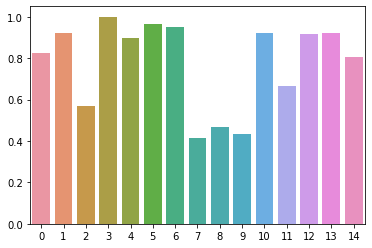

In [384]:
sns.barplot(x=list(range(len(subjects))), y=cv_b_rf_phy['test_f1_macro']);

In [385]:
min_max(cv_b_rf_phy['test_f1_macro'])

3 1.0
7 0.4165915238954013


In [386]:
## Reporting results
rf_acc, rf_f1 = raw_scores(cv_rf_all)
rf_b_acc, rf_b_f1 = raw_scores(cv_b_rf_all)
df_report_all.loc[experiment_idx, 'rf_f1'] = rf_f1
df_report_all.loc[experiment_idx, 'rf_acc'] = rf_acc
df_report_all.loc[experiment_idx, 'rf_b_f1'] = rf_b_f1
df_report_all.loc[experiment_idx, 'rf_b_acc'] = rf_b_acc

rf_acc, rf_f1 = raw_scores(cv_rf_phy)
rf_b_acc, rf_b_f1 = raw_scores(cv_b_rf_phy)
df_report_phy.loc[experiment_idx, 'rf_f1'] = rf_f1
df_report_phy.loc[experiment_idx, 'rf_acc'] = rf_acc
df_report_phy.loc[experiment_idx, 'rf_b_f1'] = rf_b_f1
df_report_phy.loc[experiment_idx, 'rf_b_acc'] = rf_b_acc

# AdaBoost

In [387]:
def create_ab_pipeline(n_estimators=100, min_samples_split=20, criterion='entropy'):
    base_estimator = DecisionTreeClassifier(criterion=criterion, min_samples_split=min_samples_split)
    model_ab = AdaBoostClassifier(base_estimator=base_estimator, n_estimators=n_estimators)
    return make_pipeline(StandardScaler(), model_ab)

### Baseline vs Stress vs Amusement

#### All modalities

In [388]:
clf_ab_all = create_ab_pipeline()
cv_ab_all = run_cv(clf_ab_all, X, y, groups=df['subject'], cv=LeaveOneGroupOut())
test_score(cv_ab_all)

{'accuracy': '64.47869291637963 +-16.511607169619165',
 'f1_macro': '55.298969054932826 +-19.095631337940592'}

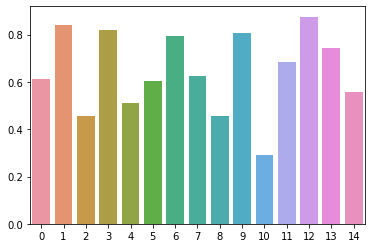

In [389]:
sns.barplot(x=list(range(len(subjects))), y=cv_ab_all['test_accuracy']);

In [390]:
min_max(cv_ab_all['test_accuracy'])

12 0.8756348321565713
10 0.28902798232695137


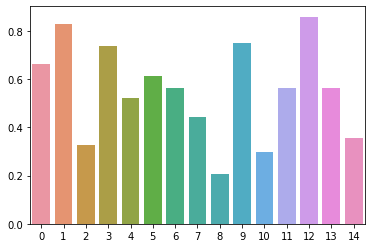

In [391]:
sns.barplot(x=list(range(len(subjects))), y=cv_ab_all['test_f1_macro']);

In [392]:
min_max(cv_ab_all['test_f1_macro'])

12 0.8592926331190952
8 0.20870798058241313


#### Physiological modalities

In [393]:
clf_ab_phy = create_ab_pipeline()
cv_ab_phy = run_cv(clf_ab_phy, X_p, y, groups=df['subject'], cv=LeaveOneGroupOut())
test_score(cv_ab_phy)

{'accuracy': '67.65107081856117 +-14.003524080288468',
 'f1_macro': '59.83875538767948 +-15.898217501732168'}

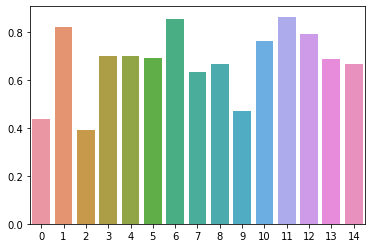

In [394]:
sns.barplot(x=list(range(len(subjects))), y=cv_ab_phy['test_accuracy']);

In [395]:
min_max(cv_ab_phy['test_accuracy'])

11 0.8649851632047477
2 0.3908368967623702


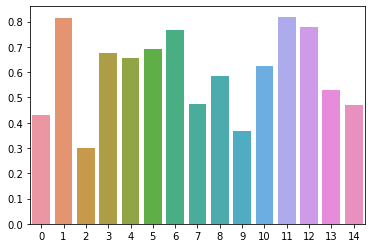

In [396]:
sns.barplot(x=list(range(len(subjects))), y=cv_ab_phy['test_f1_macro']);

In [397]:
min_max(cv_ab_phy['test_f1_macro'])

11 0.8193138567746395
2 0.3004404972552602


### Stress vs Non-stress

#### All modalities

In [398]:
clf_b_ab_all = create_ab_pipeline()
cv_b_ab_all = run_cv(clf_b_ab_all, X, y_b, groups=df['subject'], cv=LeaveOneGroupOut())
test_score(cv_b_ab_all)

{'accuracy': '80.67466917928397 +-14.153738869653523',
 'f1_macro': '74.08500045240444 +-18.58292930086182'}

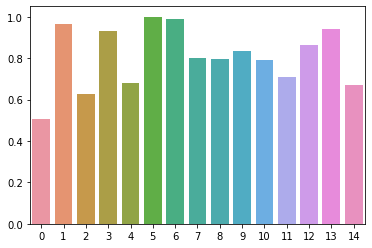

In [399]:
sns.barplot(x=list(range(len(subjects))), y=cv_b_ab_all['test_accuracy']);

In [400]:
min_max(cv_b_ab_all['test_accuracy'])

5 1.0
0 0.5046494992846924


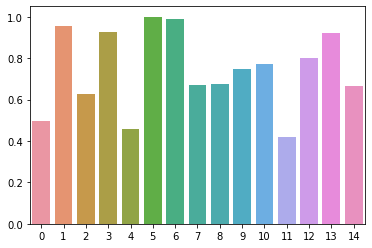

In [401]:
sns.barplot(x=list(range(len(subjects))), y=cv_b_ab_all['test_f1_macro']);

In [402]:
min_max(cv_b_ab_all['test_f1_macro'])

5 1.0
11 0.41866109784641026


#### Physiological modalities

In [403]:
clf_b_ab_phy = create_ab_pipeline()
cv_b_ab_phy = run_cv(clf_b_ab_phy, X_p, y_b, groups=df['subject'], cv=LeaveOneGroupOut())
test_score(cv_b_ab_phy)

{'accuracy': '83.45565130962734 +-13.519274301391304',
 'f1_macro': '77.61923834025146 +-18.391765936674876'}

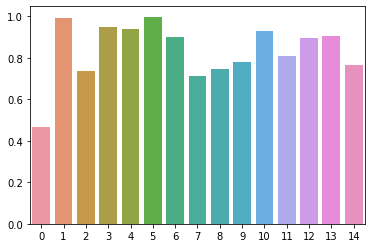

In [404]:
sns.barplot(x=list(range(len(subjects))), y=cv_b_ab_phy['test_accuracy']);

In [405]:
min_max(cv_b_ab_phy['test_accuracy'])

5 0.9985303123086344
0 0.4661421077730091


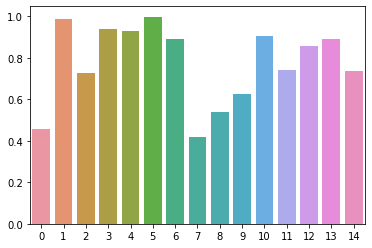

In [406]:
sns.barplot(x=list(range(len(subjects))), y=cv_b_ab_phy['test_f1_macro']);

In [407]:
min_max(cv_b_ab_phy['test_f1_macro'])

5 0.9982493500189322
7 0.4161088967436264


In [408]:
## Reporting results
ab_acc, ab_f1 = raw_scores(cv_ab_all)
ab_b_acc, ab_b_f1 = raw_scores(cv_b_ab_all)
df_report_all.loc[experiment_idx, 'ab_f1'] = ab_f1
df_report_all.loc[experiment_idx, 'ab_acc'] = ab_acc
df_report_all.loc[experiment_idx, 'ab_b_f1'] = ab_b_f1
df_report_all.loc[experiment_idx, 'ab_b_acc'] = ab_b_acc

ab_acc, ab_f1 = raw_scores(cv_ab_phy)
ab_b_acc, ab_b_f1 = raw_scores(cv_b_ab_phy)
df_report_phy.loc[experiment_idx, 'ab_f1'] = ab_f1
df_report_phy.loc[experiment_idx, 'ab_acc'] = ab_acc
df_report_phy.loc[experiment_idx, 'ab_b_f1'] = ab_b_f1
df_report_phy.loc[experiment_idx, 'ab_b_acc'] = ab_b_acc

# LDA

In [409]:
def create_lda_pipeline():
    return make_pipeline(StandardScaler(), LDA())

### Baseline vs Stress vs Non-stress

#### All modalities

In [410]:
model_lda_all = create_lda_pipeline()
cv_lda_all = run_cv(model_lda_all, X, y, groups=df['subject'], cv=LeaveOneGroupOut())
test_score(cv_lda_all)

{'accuracy': '71.62674387682108 +-11.33211766138123',
 'f1_macro': '65.30661915803545 +-12.535242577794905'}

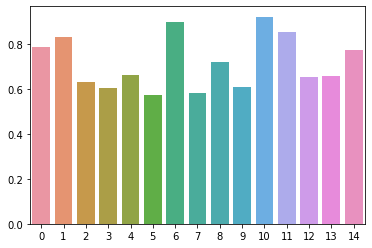

In [411]:
sns.barplot(x=list(range(len(subjects))), y=cv_lda_all['test_accuracy']);

In [412]:
min_max(cv_lda_all['test_accuracy'])

10 0.9207167403043691
5 0.5733006736068585


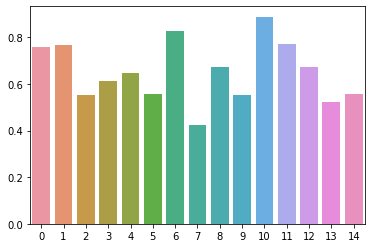

In [413]:
sns.barplot(x=list(range(len(subjects))), y=cv_lda_all['test_f1_macro']);

In [414]:
min_max(cv_lda_all['test_f1_macro'])

10 0.8889149709505785
7 0.42365088765629805


#### Physiological modalities

In [415]:
model_lda_phy = create_lda_pipeline()
cv_lda_phy = run_cv(model_lda_phy, X_p, y, groups=df['subject'], cv=LeaveOneGroupOut())
test_score(cv_lda_phy)

{'accuracy': '74.02462925388204 +-13.077506856399717',
 'f1_macro': '66.61675817610353 +-15.285442746968817'}

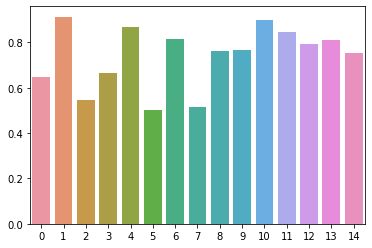

In [416]:
sns.barplot(x=list(range(len(subjects))), y=cv_lda_phy['test_accuracy']);

In [417]:
min_max(cv_lda_phy['test_accuracy'])

1 0.9130859375
5 0.500796080832823


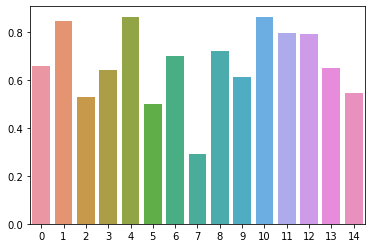

In [418]:
sns.barplot(x=list(range(len(subjects))), y=cv_lda_phy['test_f1_macro']);

In [419]:
min_max(cv_lda_phy['test_f1_macro'])

10 0.862461807316382
7 0.2921918988479306


### Stress vs Non-Stress

#### All modalities

In [420]:
model_b_lda_all = create_lda_pipeline()
cv_b_lda_all = run_cv(model_b_lda_all, X, y_b, groups=df['subject'], cv=LeaveOneGroupOut())
test_score(cv_b_lda_all)

{'accuracy': '89.0251616455377 +-9.608988218953025',
 'f1_macro': '86.07048596185419 +-12.733815270677093'}

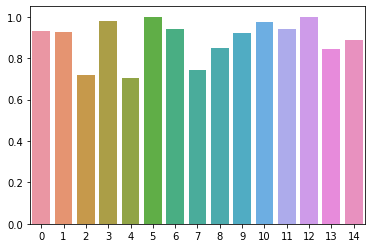

In [421]:
sns.barplot(x=list(range(len(subjects))), y=cv_b_lda_all['test_accuracy']);

In [422]:
min_max(cv_b_lda_all['test_accuracy'])

5 0.9998775260257196
4 0.7021432050657574


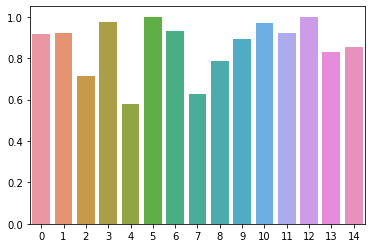

In [423]:
sns.barplot(x=list(range(len(subjects))), y=cv_b_lda_all['test_f1_macro']);

In [424]:
min_max(cv_b_lda_all['test_f1_macro'])

5 0.9998542995246666
4 0.5792608046316486


#### Physiological modalities

In [425]:
model_b_lda_phy = create_lda_pipeline()
cv_b_lda_phy = run_cv(model_b_lda_phy, X_p, y_b, groups=df['subject'], cv=LeaveOneGroupOut())
test_score(cv_b_lda_phy)

{'accuracy': '89.85557568780152 +-9.53372978861513',
 'f1_macro': '86.43388559424253 +-14.678529317649266'}

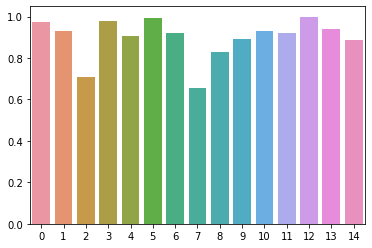

In [426]:
sns.barplot(x=list(range(len(subjects))), y=cv_b_lda_phy['test_accuracy']);

In [427]:
min_max(cv_b_lda_phy['test_accuracy'])

12 0.9995045212436516
7 0.6563626996393611


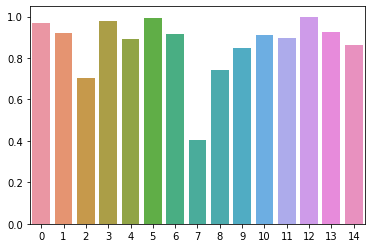

In [428]:
sns.barplot(x=list(range(len(subjects))), y=cv_b_lda_phy['test_f1_macro']);

In [429]:
min_max(cv_b_lda_phy['test_f1_macro'])

12 0.9993954539756483
7 0.4064358295080224


In [430]:
## Reporting results
lda_acc, lda_f1 = raw_scores(cv_lda_all)
lda_b_acc, lda_b_f1 = raw_scores(cv_b_lda_all)
df_report_all.loc[experiment_idx, 'lda_f1'] = lda_f1
df_report_all.loc[experiment_idx, 'lda_acc'] = lda_acc
df_report_all.loc[experiment_idx, 'lda_b_f1'] = lda_b_f1
df_report_all.loc[experiment_idx, 'lda_b_acc'] = lda_b_acc

lda_acc, lda_f1 = raw_scores(cv_lda_phy)
lda_b_acc, lda_b_f1 = raw_scores(cv_b_lda_phy)
df_report_phy.loc[experiment_idx, 'lda_f1'] = lda_f1
df_report_phy.loc[experiment_idx, 'lda_acc'] = lda_acc
df_report_phy.loc[experiment_idx, 'lda_b_f1'] = lda_b_f1
df_report_phy.loc[experiment_idx, 'lda_b_acc'] = lda_b_acc

## Experiment results

In [431]:
df_report_all

,rf_f1,rf_acc,rf_b_f1,rf_b_acc,ab_f1,ab_acc,ab_b_f1,ab_b_acc,lda_f1,lda_acc,lda_b_f1,lda_b_acc
0,0.569973,0.694808,0.764492,0.848803,0.531372,0.628832,0.730374,0.799242,0.653066,0.716267,0.860705,0.890252
1,0.569680,0.691200,0.760651,0.843797,0.539400,0.633503,0.731361,0.800324,0.653066,0.716267,0.860705,0.890252
2,0.564980,0.688050,0.758422,0.845627,0.553703,0.641779,0.737756,0.800519,0.653066,0.716267,0.860705,0.890252
3,0.587290,0.697717,0.760592,0.845984,0.541359,0.631875,0.727363,0.794404,0.653066,0.716267,0.860705,0.890252
4,0.565213,0.681651,0.759584,0.843335,0.552990,0.644787,0.740850,0.806747,0.653066,0.716267,0.860705,0.890252


In [450]:
eval_all = df_report_all.describe().T[['mean', 'std']].apply(lambda x: x * 100).round(decimals=2)
eval_all

,mean,std
rf_f1,57.14,0.92
rf_acc,69.07,0.62
rf_b_f1,76.07,0.23
rf_b_acc,84.55,0.22
ab_f1,54.38,0.95
ab_acc,63.62,0.68
ab_b_f1,73.35,0.56
ab_b_acc,80.02,0.44
lda_f1,65.31,0.00
lda_acc,71.63,0.00


In [463]:
# eval_all.sort_values(by='mean', ascending=False).to_markdown()
# eval_all.to_markdown()

In [432]:
df_report_phy

,rf_f1,rf_acc,rf_b_f1,rf_b_acc,ab_f1,ab_acc,ab_b_f1,ab_b_acc,lda_f1,lda_acc,lda_b_f1,lda_b_acc
0,0.611613,0.712413,0.792816,0.858259,0.600025,0.677185,0.765867,0.824575,0.666168,0.740246,0.864339,0.898556
1,0.595537,0.707775,0.789591,0.860137,0.610302,0.687882,0.768598,0.824075,0.666168,0.740246,0.864339,0.898556
2,0.605814,0.706488,0.787350,0.857363,0.579471,0.661721,0.772506,0.828806,0.666168,0.740246,0.864339,0.898556
3,0.617625,0.715526,0.780956,0.851126,0.594276,0.670094,0.775233,0.832660,0.666168,0.740246,0.864339,0.898556
4,0.617676,0.711437,0.778227,0.849322,0.598388,0.676511,0.776192,0.834557,0.666168,0.740246,0.864339,0.898556


In [456]:
eval_phy = df_report_phy.describe().T[['mean', 'std']].apply(lambda x: x * 100).round(decimals=2)
eval_phy

,mean,std
rf_f1,60.97,0.93
rf_acc,71.07,0.36
rf_b_f1,78.58,0.61
rf_b_acc,85.52,0.47
ab_f1,59.65,1.12
ab_acc,67.47,0.97
ab_b_f1,77.17,0.44
ab_b_acc,82.89,0.47
lda_f1,66.62,0.00
lda_acc,74.02,0.00


In [464]:
# eval_phy.to_markdown()

# Feature Importance

### Baseline vs Stress vs Amusement

In [458]:
fi_3 = DecisionTreeClassifier()
fi_3.fit(X, y)
df_3_fi = pd.DataFrame({'cols': X.columns, 'imp': fi_3.feature_importances_}).sort_values('imp', ascending=False)

In [459]:
df_3_fi[:10]

,cols,imp
64,RESP_exhal_mean,0.239524
36,EDA_SCR_no,0.135226
15,ECG_hr_mean,0.106965
56,EMG_peak_amp_sum,0.084956
5,ACC_xyz_std,0.068314
74,TEMP_min,0.057586
46,EDA_std,0.039229
58,EMG_peak_no,0.024425
6,ACC_xzy_mean,0.023665
1,ACC_x_mean,0.022358


In [435]:
# df_3_fi.iloc[:10].to_markdown()

### Stress vs Non-stress

In [460]:
fi_b = DecisionTreeClassifier()
fi_b.fit(X, y_b)
df_b_fi = pd.DataFrame({'cols': X.columns, 'imp': fi_b.feature_importances_}).sort_values('imp', ascending=False)
df_b_fi[:10]

,cols,imp
64,RESP_exhal_mean,0.395155
15,ECG_hr_mean,0.144775
36,EDA_SCR_no,0.138381
1,ACC_x_mean,0.042426
72,TEMP_max,0.037903
58,EMG_peak_no,0.037576
44,EDA_scr_area,0.034910
65,RESP_exhal_std,0.023892
8,ACC_y_mean,0.016804
56,EMG_peak_amp_sum,0.016447


In [437]:
# df_b_fi.iloc[:10].to_markdown()